<a href="https://colab.research.google.com/github/supriya130114/Abalone/blob/main/abaloneageprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.rename(columns={'Whole weight':'Whole_weight','Shucked weight':'Shucked_weight','Viscera weight':'Viscera_weight','Shell weight':'Shell_weight'},inplace=True)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [7]:
df['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [ ]:
#its clear that maximum no.of abalones have rings between 8-11

In [8]:

enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
df.corr()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


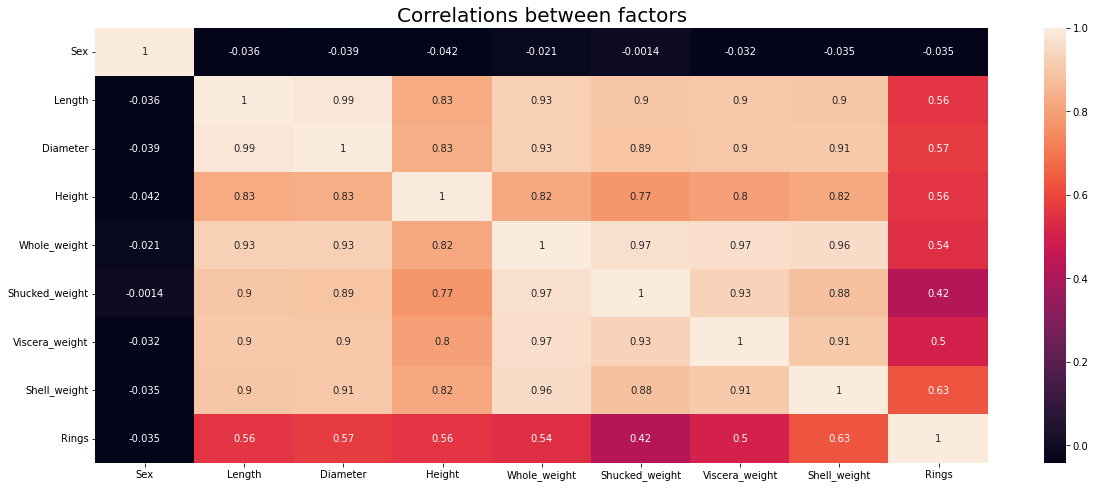

In [10]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [ ]:
#we can see by observations that weight, length and  diameter are  hightly correlated......so we deal with it afterwards...

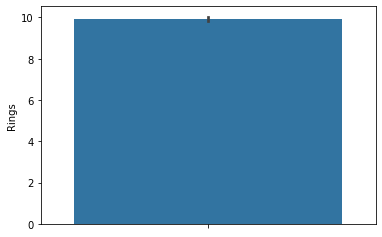

In [11]:
#lets visualize and analyse the data
sns.barplot(data=df,y='Rings')
plt.show()


In [ ]:
#mostly abalones have no.of rings around 10

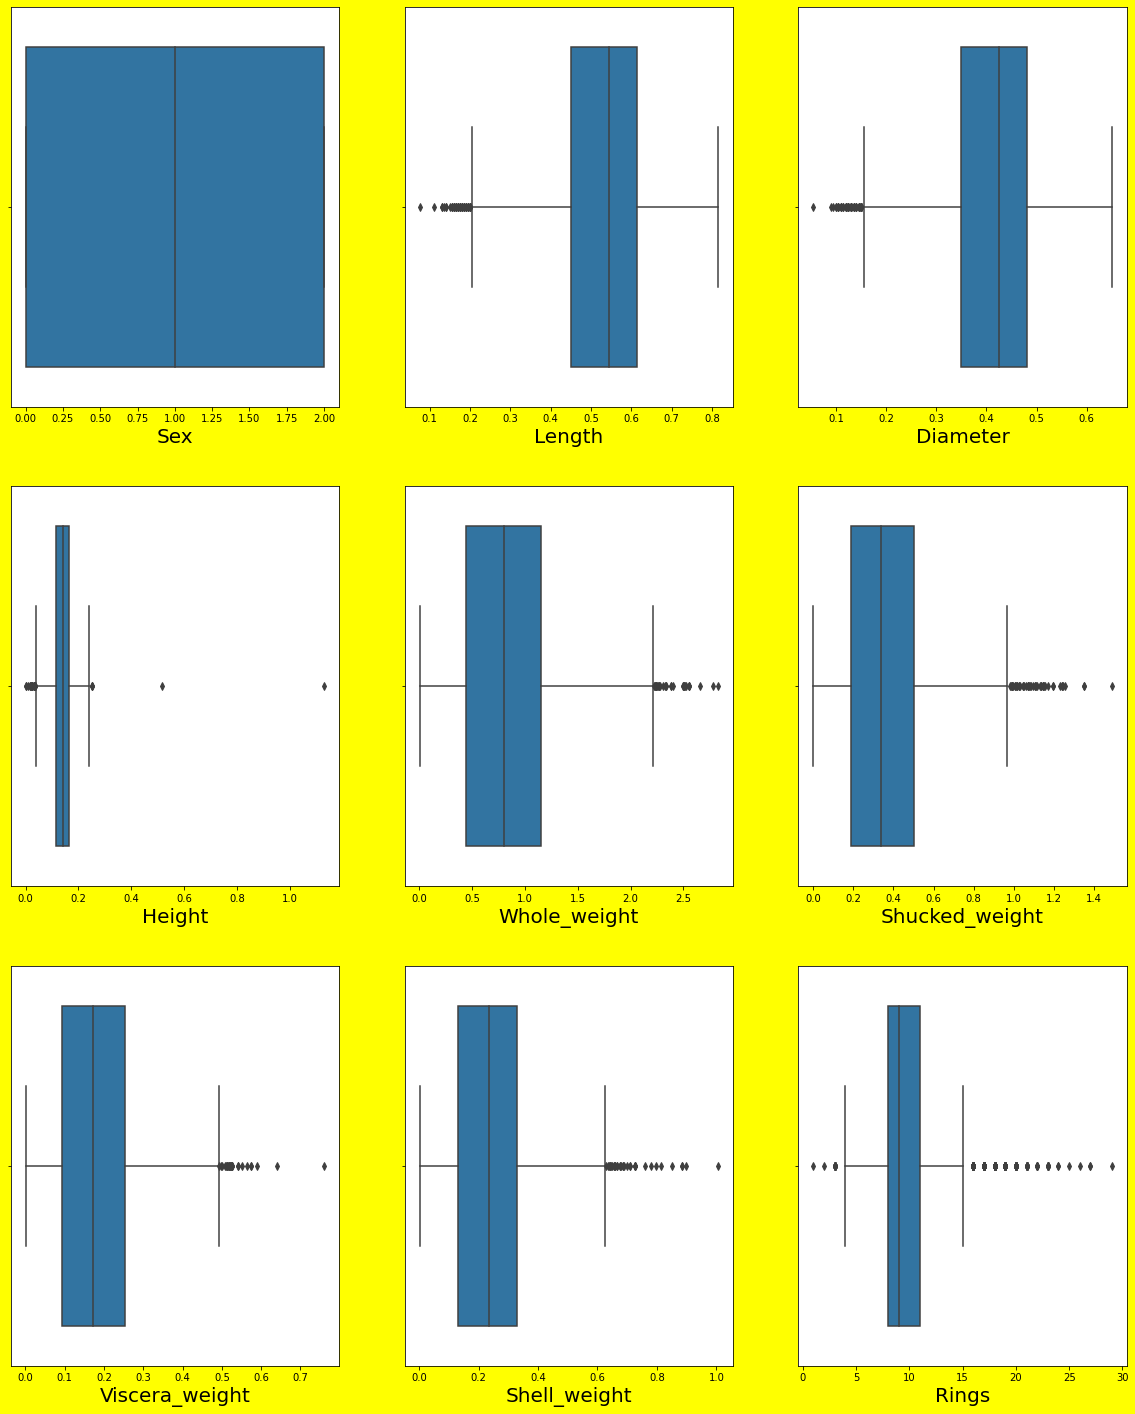

In [12]:
#lets visualize and analyse the data

plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
#so,as we can see there are outliers present in the continuos data so, now we will remove outliers by quantile methodq1=data.quantile(0.25)

In [13]:
q1=df.quantile(0.25)

In [14]:
q3=df.quantile(0.75)

In [15]:
iqr=q3-q1

In [16]:
ww_high=(q3.Whole_weight + (1.5 * iqr.Whole_weight))
ww_high

2.22025

In [17]:
index = np.where(df['Whole_weight'] > ww_high)
index

(array([ 165,  358,  891, 1051, 1052, 1193, 1206, 1207, 1209, 1426, 1427,
        1428, 1761, 1762, 1763, 2265, 2334, 2623, 2624, 2811, 2862, 2863,
        3007, 3008, 3188, 3427, 3599, 3715, 3800, 3993]),)

In [18]:
df = df.drop(df.index[index])
df.shape

(4147, 9)

In [19]:
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4142,4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4143,4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4144,4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4145,4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [20]:
sw_high =(q3.Shucked_weight + (1.5 * iqr.Shucked_weight))
sw_high

0.976

In [21]:
index = np.where(df['Shucked_weight'] > sw_high)
index

(array([1045, 1191, 1193, 1196, 1408, 1409, 1515, 1516, 1737, 1738, 1742,
        1744, 1806, 1967, 2527, 2606, 2656, 2691, 2791, 2948, 2950, 3058,
        3686, 3932, 3933]),)

In [22]:
df = df.drop(df.index[index])
df.shape

(4122, 9)

In [23]:
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4117,4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4118,4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4119,4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4120,4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [24]:
vw_high=(q3.Viscera_weight+ (1.5 * iqr.Viscera_weight))
print (vw_high)

0.49225


In [25]:
index = np.where(df['Viscera_weight'] > vw_high)
index

(array([ 169, 1194, 1407, 1733, 1735, 2673, 3579, 4093]),)

In [26]:
df = df.drop(df.index[index])
df.shape

(4114, 9)

In [27]:
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4109,4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4110,4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4111,4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4112,4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [28]:
s_high=(q3.Shell_weight + (1.5 * iqr.Shell_weight))
print (s_high)

0.6275


In [29]:
index = np.where(df['Shell_weight'] >s_high)
index

(array([  81,  129,  157,  163,  164,  165,  166,  167,  275,  332, 1790,
        1951, 2056, 2074, 2123, 2127, 2174, 2239, 2332, 3096, 3097, 3099,
        3869, 4083]),)

In [30]:
df = df.drop(df.index[index])
df.shape

(4090, 9)

In [31]:
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4085,4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4086,4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4087,4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4088,4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [32]:
h_high=(q3.Height + (1.5 * iqr.Height))
print (h_high)

0.24000000000000002


In [33]:
index = np.where(df['Height'] > h_high)
index

(array([2005, 2129]),)

In [34]:
df= df.drop(df.index[index])
df.shape

(4088, 9)

In [35]:
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4083,4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4084,4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4085,4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4086,4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [36]:
D_low=(q1.Diameter - (1.5 * iqr.Diameter))
print (D_low)

0.15499999999999997


In [37]:
index = np.where(df['Diameter']< D_low)
index

(array([  43,   44,  146,  147,  226,  227,  228,  229,  294,  295,  310,
         452,  507,  510,  512,  513,  598,  681,  683,  705,  706,  707,
         878,  884, 1036, 1037, 1038, 1398, 1780, 1940, 1941, 1942, 2065,
        2066, 2118, 2120, 2121, 2287, 2314, 2323, 2324, 2401, 2487, 2647,
        2648, 3068, 3070, 3113, 3241, 3303, 3394, 3395, 3443, 3521, 3634,
        3754, 3816, 3819, 3907]),)

In [38]:
df = df.drop(df.index[index])
df.shape

(4029, 9)

In [39]:
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4024,4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4025,4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4026,4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4027,4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [40]:
L_low=(q1.Length - (1.5 * iqr.Length))
print (L_low)

0.20250000000000004


In [41]:
index = np.where(df['Length'] < L_low)
index

(array([1012, 1158]),)

In [42]:
df = df.drop(df.index[index])
df.shape

(4027, 9)

In [43]:
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4022,4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4023,4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4024,4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4025,4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [44]:
h_low =(q1.Height - (1.5 * iqr.Height))
print (h_low)

0.039999999999999994


In [45]:
index = np.where(df['Height'] < h_low)
index

(array([1129, 1203, 3848]),)

In [46]:
df = df.drop(df.index[index])
df.shape

(4024, 9)

In [47]:
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4019,4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4020,4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4021,4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4022,4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [48]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [49]:
y = df['Rings']
X = df.drop(columns=['Rings'])

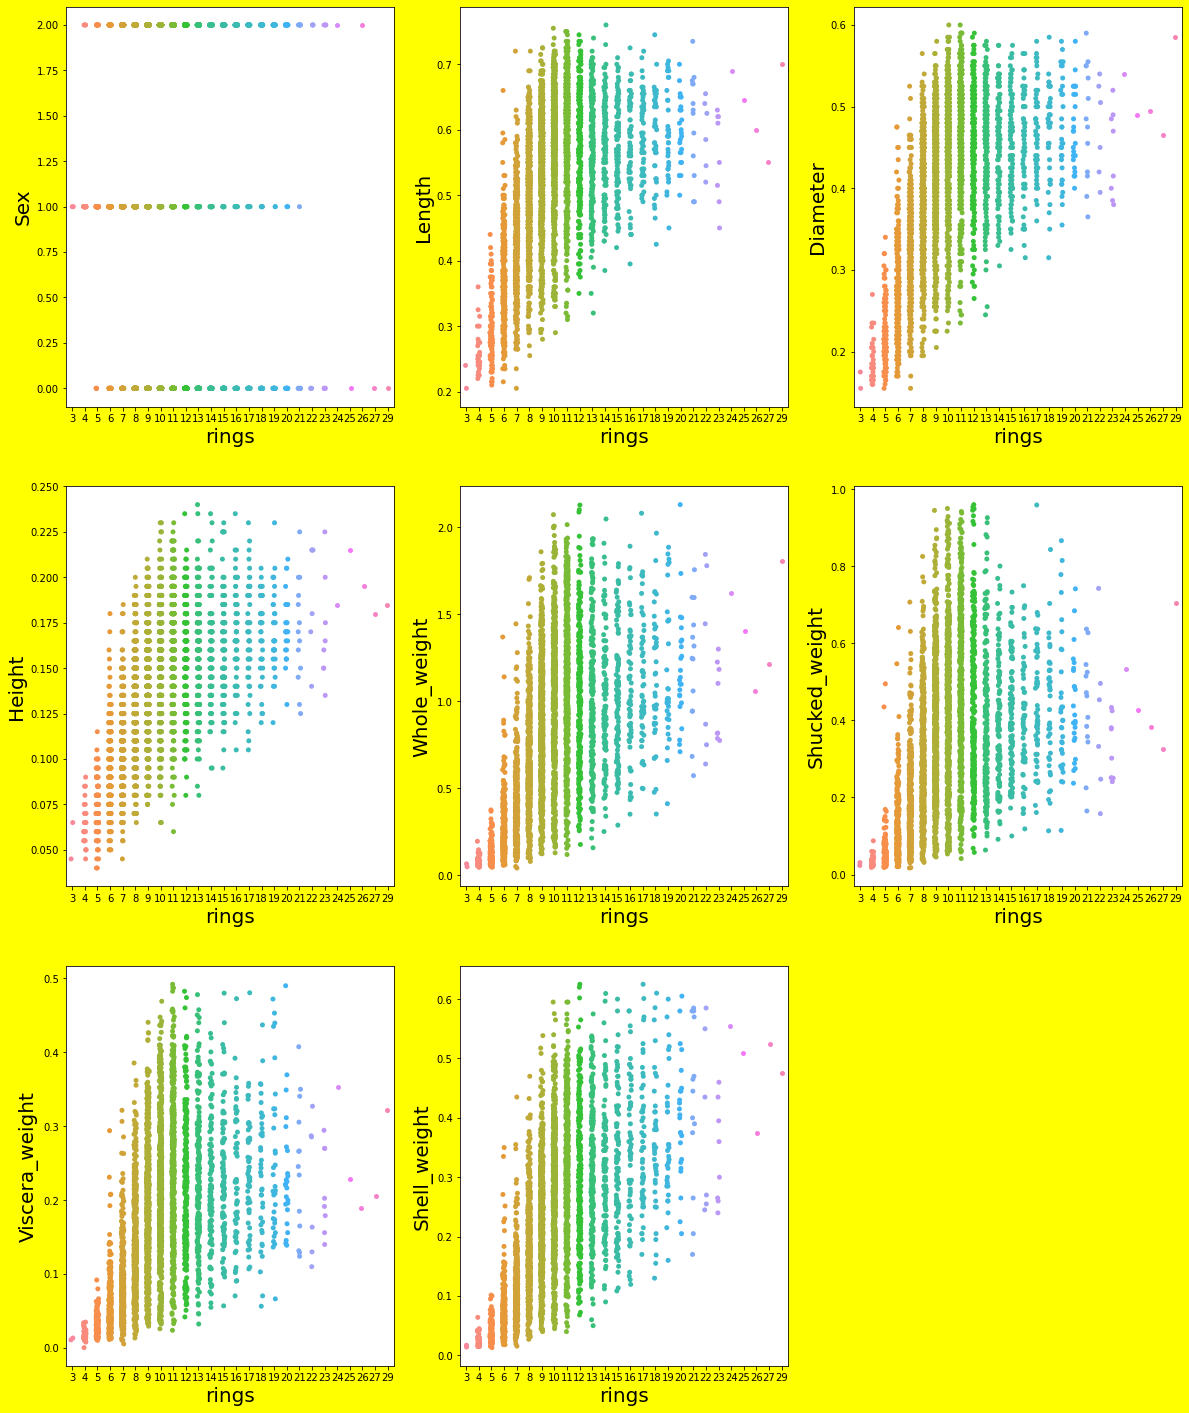

In [50]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in X:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
        plt.xlabel('rings',fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
# abalones having length between 0.3-0.8 have 11 rings
#abalones having diameter between 0.25-0.65 have 11 rings
#abalones having maximum rings have height between 0.1-0.25
#females have no. of rings btw 5-29
#infants have no. of rings btw 1-21
# males have no.of rings btw 3-27
#abalones having wholeweight between 0.2-2.7 have 11-12 rings
#abalones having shuckedweight between 0.1-1.25 have rings between 10-12 
#abalones hving viscera weight between 0.1-0.6 have 10-13 rings
#abalones having shell weight between 0.1-0.7 have 10-12 rings
#overall abalones having 10-12 rings are more in no. and they have weight,height,length,diameter in the above ranges

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf= RandomForestClassifier()

In [53]:
for i in range(0,100):
    x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    pred_train = rf.predict(x_train)
    y_pred= rf.predict(x_test)
    print(f"At random state{i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}")
    print("\n")

At random state0,the training accuracy is:-1.0
At random state0,the testing accuracy is:-0.22608695652173913


At random state1,the training accuracy is:-1.0
At random state1,the testing accuracy is:-0.23229813664596274


At random state2,the training accuracy is:-1.0
At random state2,the testing accuracy is:-0.24720496894409938


At random state3,the training accuracy is:-1.0
At random state3,the testing accuracy is:-0.24099378881987576


At random state4,the training accuracy is:-1.0
At random state4,the testing accuracy is:-0.2795031055900621


At random state5,the training accuracy is:-1.0
At random state5,the testing accuracy is:-0.24472049689440994


At random state6,the training accuracy is:-1.0
At random state6,the testing accuracy is:-0.25838509316770186


At random state7,the training accuracy is:-1.0
At random state7,the testing accuracy is:-0.23354037267080746


At random state8,the training accuracy is:-1.0
At random state8,the testing accuracy is:-0.2608695652173913


At 

In [54]:
from sklearn.metrics import classification_report
rf= RandomForestClassifier()
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=60)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 23.975155279503106
[[ 1  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9 13 18  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1 20 24 31 11  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5 21 39 31 16  6  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  8 23 35 35 23  3  1  0  0  0  0  0  0  1  0  0]
 [ 0  0  2  3 13 32 37 28  4  1  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  2  7 22 34 27  2  4  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  2  4 11 12 13  4  2  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  4  2  9 11  4  3  0  2  3  2  0  1  1  0  0]
 [ 0  0  0  1  2  4  2  4  2  2  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  3  5  4  1  1  1  1  1  0  0  1  0  0]
 [ 0  0  0  0  1  2  1  2  0  1  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  3  2  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=11)

In [72]:
x_train.shape

(2696, 8)

In [73]:
y_train.shape

(2696,)

In [74]:
x_test.shape

(1328, 8)

In [75]:
y_test.shape

(1328,)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [77]:
list_algo = [LinearRegression,SVR,DecisionTreeRegressor,KNeighborsRegressor]

In [79]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
for i in list_algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print(i,r2_score(y_test,pred))
    print(mean_squared_error(y_test,pred))
    print('---------')

<class 'sklearn.linear_model._base.LinearRegression'> 0.4953236436488101
5.0335836532017195
---------
<class 'sklearn.svm._classes.SVR'> 0.4337161072263662
5.648050101545198
---------
<class 'sklearn.tree._classes.DecisionTreeRegressor'> 0.008781859332772868
9.886295180722891
---------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> 0.4650185280853095
5.335843373493976
---------


In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))

0.4953236436488101
5.0335836532017195


In [83]:
for i in range(2,11):
    cross_score = cross_val_score(lr,X,y,cv=i)
    print('cv...',i)
    print(cross_score.mean())
    print('-------')

cv... 2
0.5054852157723249
-------
cv... 3
0.4824174094761884
-------
cv... 4
0.38712750648712957
-------
cv... 5
0.3728906696514911
-------
cv... 6
0.38887952879406
-------
cv... 7
0.4144461981163577
-------
cv... 8
0.3419464994658985
-------
cv... 9
0.38670664332681276
-------
cv... 10
0.3116842480387752
-------


In [84]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lr,step=1)
rfe = rfe.fit(x_train,y_train)
selected_feature = pd.DataFrame({'features':list(x_train.columns),'ranking':rfe.ranking_})

In [85]:
selected_feature

,features,ranking
0,Sex,5
1,Length,4
2,Diameter,3
3,Height,1
4,Whole_weight,2
5,Shucked_weight,1
6,Viscera_weight,1
7,Shell_weight,1


In [86]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)
rfe_model = lr.fit(x_train_rfe,y_train)

In [87]:
 p = rfe_model.predict(x_test_rfe)

In [88]:
mean_squared_error(p,y_test)

5.2700314890328706

In [89]:
x_train_rfe


array([[0.135 , 0.272 , 0.1435, 0.144 ],
       [0.15  , 0.4315, 0.276 , 0.315 ],
       [0.125 , 0.3545, 0.2075, 0.225 ],
       ...,
       [0.155 , 0.385 , 0.246 , 0.265 ],
       [0.085 , 0.042 , 0.0285, 0.043 ],
       [0.145 , 0.4345, 0.212 , 0.2475]])

In [91]:
svr = SVR()
svr.fit(x_train,y_train)
pred = svr.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
for i in range(2,11):
    cross_score = cross_val_score(svr,X,y,cv=i)
    print('cv...',i)
    print(cross_score.mean())
    print('-------')

0.4337161072263662
5.648050101545198
cv... 2
0.427464415815044
-------
cv... 3
0.4421364388821584
-------
cv... 4
0.4133321152807282
-------
cv... 5
0.39830934759584996
-------
cv... 6
0.4238626140502311
-------
cv... 7
0.42850543243578265
-------
cv... 8
0.4206285417719661
-------
cv... 9
0.42202876121612154
-------
cv... 10
0.3966185702626891
-------


In [92]:
k_n = KNeighborsRegressor()
k_n.fit(x_train,y_train)
pred = k_n.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))

0.4650185280853095
5.335843373493976


In [94]:
for i in range(2,11):
    cross_score = cross_val_score(svr,X,y,cv=i)
    print('cv...',i)
    print(cross_score.mean())
    print('-------')

cv... 2
0.427464415815044
-------
cv... 3
0.4421364388821584
-------
cv... 4
0.4133321152807282
-------
cv... 5
0.39830934759584996
-------
cv... 6
0.4238626140502311
-------
cv... 7
0.42850543243578265
-------
cv... 8
0.4206285417719661
-------
cv... 9
0.42202876121612154
-------
cv... 10
0.3966185702626891
-------


In [95]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(r2_score(y_test,pred_rf))
print(mean_squared_error(y_test,pred_rf))

0.4896235082831891
5.090436144578313


In [96]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(n_estimators=100,base_estimator=lr)
ab.fit(x_train,y_train)
pred_ab = ab.predict(x_test)
print(r2_score(y_test,pred_ab))
print(mean_squared_error(y_test,pred_ab))

0.4751241833737645
5.235050735549469


In [97]:
import pickle
abalone_file = 'pickl.pkl'
pickle.dump(rf,open(abalone_file,'wb'))

In [98]:
original_res = np.array(y_test)
pred_res = np.array(rf.predict(x_test))
df_comparison = pd.DataFrame({'original':pred_res,'predicted':pred_res})
df_comparison

,original,predicted
0,13.64,13.64
1,14.60,14.60
2,11.06,11.06
3,10.60,10.60
4,9.01,9.01
...,...,...
1323,9.66,9.66
1324,8.68,8.68
1325,11.86,11.86
1326,9.41,9.41
